In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statistics as st

In [27]:
df_2021 = pd.read_csv('world-happiness-report-2021.csv')

In [28]:
df1_2021= df_2021[['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].copy()

In [4]:
df1_2021.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


## Basic Score Explanations of the Variables:
##### Ladder score : Happiness score. 0 lowest, 10 maximum
##### Social Support: Perceived social support score 0 lowest, 10 maximum
##### Freedom to make life choices: Perceived freedom of expression 0 lowest, 10 maximum
##### Perceptions of corruption: Perceived corruption and kind of distrust in institutions 0 lowest, 10 maximum distrust

In [5]:
df1_2021.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


### For the sake of the learning the concepts in depht we will first focus on only 'Ladder score' variable

In [6]:
df1_2021['Ladder score'].describe()

count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000
Name: Ladder score, dtype: float64

### ilk yorumlama

ya ortalamaya dayanan yaklaşımla bakacağız ya orta değere dayanan yaklaşımla 
ya mean based, ya median based

mean ve 50% e baktığımızda birbirine çok yakın olduğunu görüyoruz. sadece mean median'dan çok az daha küçük.

Bu değerlere bakarak simetriğe yakın bir dağılım olabilir diyebilirim ama hemen sonuca gitmem. min ve max değerlerine bakarım. bunların %25 ile %75 arasındaki farka bakarım.
%25 ile min arasındaki farka ve %75 ile max arasındaki farka bakarım.

max ile %75 arasındaki fark çok büyük değil ama min ile 25% arasındaki fark benim dikkatimi çekiyor! buna bakmamız lazım. Her ne kadar şeklimin simetrik olduğunu düşünsem de acaba sol tarafta outlier olabilir mi?

min-25 arasında yaklaşık 2.3 fark olduğunu, bu 0 ile 10 aralığında olan değerler için büyük bir rakam!
max-75 arasında yaklaşık 1.6 fark olduğunu gördüm.

fakat mean ve median değerlerine baktığımda aralarında çok az fark olduğunu gördüm. (5.5328839 - 5.53400) demek ki şeklim yaklaşık simetriğe yakın olacak diyebilirim. sola-sağa skewed olması için o tarafta ağırlık olacak şekilde değerlerin kayması lazım. öyle bir iki değer mean'den kaymışsa şeklimi çok etkilemeyecektir.

min ve max değerler 1,5 IQR arasında kalıyorsa python min ve max değerlerini Q3+1,5IQR ve Q1-1.5 IQR üzerinde çizer. arasında kalmıyorsa dışında çizer. (outlier var demektir)

### mean & median

eğer mean mediandan büyükse -->  sağa çekiyor
eğer mean median birbirine eşit (veya eşite yakınsa) --> simetrik
mean median'dan küçükse --> sola çekiyor

(Generally, if the shape is:

Perfectly symmetric, the mean equals the median.
Skewed to the right, the mean is larger than the median.
Skewed to the left, the mean is smaller than the median.)

mean, verilerin aritmetik ortalaması olduğu için işin içinde değerlerin ağırlığı söz konusudur ve bu yüzden şeklimizi şekillendiren değerdir!! median ise tek bir (orta) veridir. dolayısıyla mean'in median'a göre durumuna bakıyoruz, mean küçük yani solda kalıyorsa sola skewed olduğunu, sağda kalıyorsa sağa skewed olduğunu söyleyebiliyoruz.

### skewness

eğer skewness -1'den küçük veya +1den büyükse dağılım highly skewed

eğer skewness -1 ile -1/2 veya +1/2 ile +1 arasında ise dağılım moderately skewed (orta dereceli, rahatsız etmeyecek kadar)

eğer skewness -1/2 ile +1/2 arasında ise dağılım hemen hemen simetriktir.

Rule of thumb:
If skewness is less than —1 or greater than +1, the distribution is highly skewed.
If skewness is between —1 and —1/2 or between +1/2 and +1, the distribution is moderately skewed.
If skewness is between —1/2 and +1/2, the distribution is approximately symmetric.

In [7]:
stats.skew(df1_2021['Ladder score'])

-0.10321590748801858

outlier'ı tespit için en kolay kullanabileceğimiz yöntem boxplot'tur

Skewness bir dağılımın simetrik olmama derecesini ölçerken; kurtosis dağılımın ortasında çok fazla veya çok az örneğin bulunma derecesini gösteren bir indekstir yani şeklin basıklığından bahsediyoruzdur. Eğer skorların çoğu ortalamanın solunda ise ve bu yüzden ortalamadan küçüklerse bu dağılımım pozitif olarak çarpık adlandırılır.

Shape - Kurtosis
Image of Kurtosis

(Skewness bir dağılımın simetrik olmama derecesini ölçerken; kurtosis dağılımın ortasında çok fazla veya çok az örneğin bulunma derecesini gösteren bir indekstir. Eğer skorların çoğu ortalamanın solunda ise ve bu yüzden ortalamadan küçüklerse bu dağılımm pozitif olarak çarpık adlandırılır.)

image.png

### datamı analiz etmeden önce outlier'ım var mı bunu bulmak isterim. outlierlarım çoksa analizimi median based yaparım, azsa veya yoksa analizimi mean based yaparım 

# Ladder Score

### histogram

<Figure size 2800x2400 with 0 Axes>

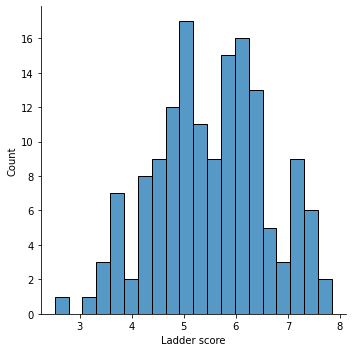

In [8]:
plt.figure(figsize=(14,12), dpi=200)
sns.displot(x="Ladder score", data=df1_2021, bins=20);

<Figure size 2800x2400 with 0 Axes>

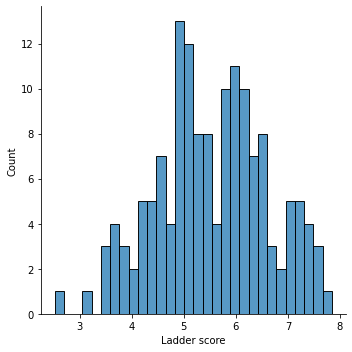

In [9]:
plt.figure(figsize=(14,12), dpi=200)
sns.displot(x="Ladder score", data=df1_2021, bins=30);

# bin değerini 30 yaptım. şimdi soldaki ayrık değeri daha net görebiliyorum.

<Figure size 2800x2400 with 0 Axes>

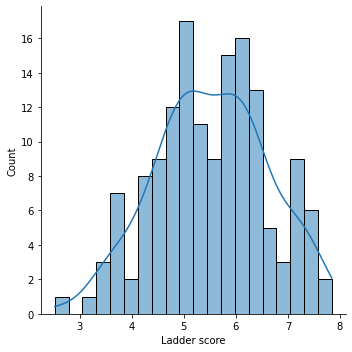

In [10]:
plt.figure(figsize=(14,12), dpi =200)
sns.displot(x='Ladder score', data= df1_2021, bins=20, kde= True)

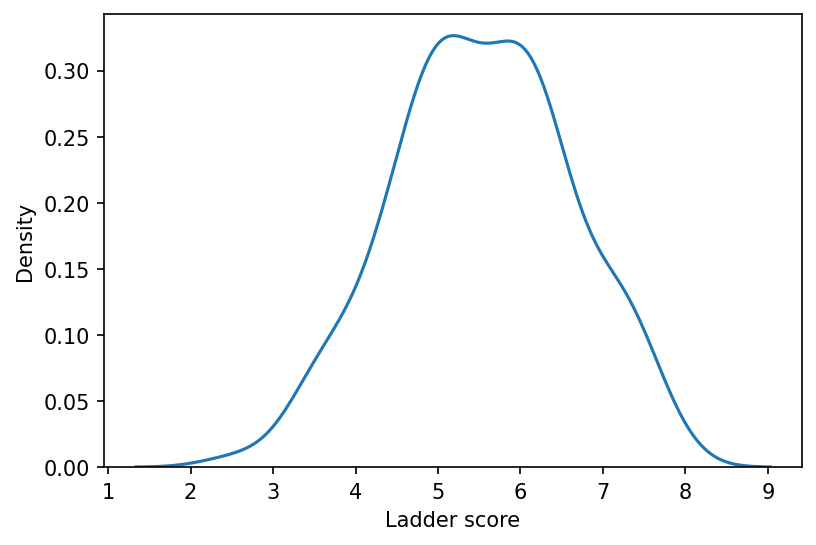

In [11]:
plt.figure(figsize=(6,4),dpi=150)
sns.kdeplot(x="Ladder score", data=df_2021);

### Boxplot

c:\users\hüseyin\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1312: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


<AxesSubplot:ylabel='Ladder score'>

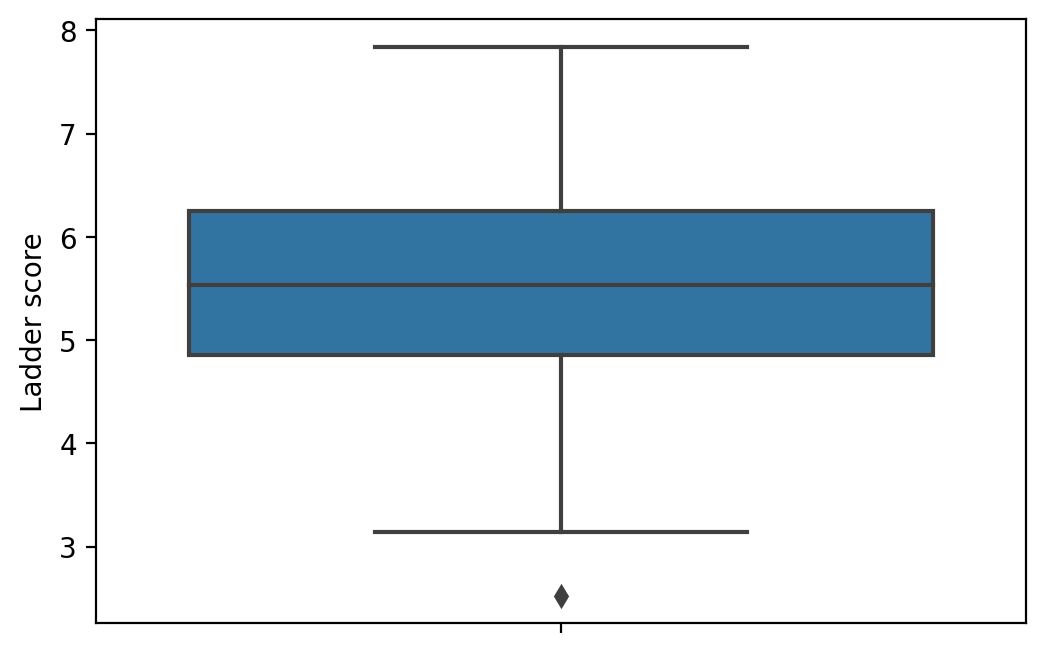

In [29]:
plt.figure(figsize=(6,4), dpi=200)
sns.boxplot(y='Ladder score', data=df1_2021, orient='h')

# boxplot'una baktığımda solda bir OUTLIER olduğunu gördüm.
# eğer orient = h (horizantal) ise x değerinin kesinlikle sayısal bir değer olması gerekiyor.
# eğer orient = v (vertical) x ve y değerinin sayısal olması gerekir

In [ ]:
Q1, Q3 = np.percentile(df1_2021['Ladder score'], [25, 75])
Q1, Q3

# Q1 ve Q3 değerlerini percentile fonksiyonu ile hesapladık

In [ ]:
IQR = Q3 - Q1
IQR

In [ ]:
stats.iqr(df1_2021['Ladder score'])

# IQR değerimi scipy kütüphanesindeki bu fonksiyonu kullanarak da hesaplayabilirim.

In [ ]:
minimum = Q1 - 1.5 * IQR
minimum

# bu boxplotumun minimumu. 
# bu data için minimum değerim de boxplot'umum minimumu ile aynı

In [ ]:
maximum = Q3 + 1.5 * IQR
maximum

In [ ]:
potential_outliers = df1_2021[(df1_2021["Ladder score"] < minimum) | (df1_2021["Ladder score"] > maximum)]
potential_outliers

# potansiyel tüm outlier'ları veren condition'ımı yazdım.

In [ ]:
outlier_ayıklanmış = df1_2021[~((df1_2021["Ladder score"] < minimum) | (df1_2021["Ladder score"] > maximum))]
outlier_ayıklanmış 

# conditionın başına tilde (~) koyarsam tam tersini alır yani burada limitler içinde kalan verileri getirir 

In [ ]:
df1_2021[["Social support"]].describe().T

In [ ]:
outlier_ayıklanmış[["Social support"]].describe().T

mean ile median arasındaki farklara bakarsak; 
outlierları ayıklanmış datada mean ile median arasındaki farkın  orjinal dataya göre daha az olduğunu görüyoruz. 

orjinal datada -->    (0.832 - 0.814745 = 0.017255)
ayıklanmış datada --> (0.832 - 0.817122 = 0.014878)

çünkü outlier veriler ağırlığı ölçüsünde kendi bulunduğu tarafa doğru ortalamayı (mean) median değerden uzaklaştırıyor. bu durumda datamın şekli outlierların bulunduğu yere doğru skewed oluyor.

standart sapma (std) nin de aynı mantıkla outlier'ların olduğu orjinal datada daha büyük olduğu yani standarttan daha fazla sapmış olması beklenen bir durumdur.
outlierları ayıkladığımızda ise standart sapmanın daha küçük olması doğal bir durumdur.